___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("final_scout_not_dummy2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [6]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,"Alloy wheels, Voice Control",7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [15]:
df.sample(10)

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
15309,Renault Espace,Transporter,14999,101000.000000,Used,Diesel,5,6.0,3.0,1.0,96.0,0,Metallic,Cloth,Manual,1598.0,1697.0,front,4.5,116.0,Standard,Plus,Safety Premium Package
5279,Audi A3,Sedans,24490,1647.362609,Pre-registered,Diesel,1,7.0,0.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1360.0,front,3.9,103.0,Standard,Standard,Safety Premium Package
6528,Opel Astra,Sedans,16990,6800.000000,Used,Benzine,1,6.0,2.0,1.0,110.0,0,Metallic,Cloth,Automatic,1399.0,1273.0,front,5.4,124.0,Standard,Plus,Safety Premium Package
12401,Opel Insignia,Station wagon,33980,8000.000000,Used,Diesel,4,8.0,0.0,1.0,125.0,1,Metallic,Part/Full Leather,Automatic,1956.0,1613.0,front,5.5,145.0,Premium Plus,Plus,Safety Premium Package
4306,Audi A3,Sedans,17500,28400.000000,Used,Diesel,1,6.0,2.0,1.0,81.0,0,Metallic,Part/Full Leather,Manual,1598.0,1335.0,front,4.0,107.0,Standard,Standard,Safety Premium Package
5488,Audi A3,Sedans,23925,25.000000,New,Benzine,1,6.0,0.0,0.0,85.0,0,Metallic,Cloth,Manual,999.0,1360.0,front,5.1,117.0,Standard,Plus,Safety Standard Package
2569,Audi A1,Compact,21990,1647.362609,New,Benzine,2,5.0,0.0,1.0,70.0,0,Metallic,Cloth,Manual,999.0,1165.0,front,4.6,104.0,Standard,Plus,Safety Premium Package
3042,Audi A3,Sedans,15320,92067.000000,Used,Diesel,2,6.0,3.0,1.0,81.0,1,Metallic,Cloth,Manual,1598.0,1350.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
12212,Opel Insignia,Station wagon,20890,29010.000000,Used,Diesel,5,6.0,1.0,1.0,125.0,1,Metallic,Cloth,Manual,1956.0,1487.0,front,5.4,142.0,Standard,Plus,Safety Premium Package
3002,Audi A3,Sedans,14980,291800.000000,Used,Diesel,6,6.0,3.0,1.0,110.0,0,Metallic,Cloth,Manual,1968.0,1360.0,4WD,4.7,125.0,Premium,Plus,Safety Premium Package


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

### Converting the Extras feature from object to numeric

In [12]:
df["Extras"] = df.Extras.str.count(",") + 1
df.Extras

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [16]:
df.Extras.value_counts()
# what about grouping them 1-2 extras, 3-4 extras and over 5 extras???

1     7009
2     3391
3     2684
4     1404
5      743
6      409
7      174
8       60
9       28
10       7
Name: Extras, dtype: int64

## multicollinearity control

In [13]:
df.corr()

,price,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
price,1.000000,-0.399443,0.251408,0.530563,-0.473689,-0.144672,0.696532,0.008508,0.282075,0.468264,0.301448,0.347668
km,-0.399443,1.000000,0.018517,-0.033087,0.758370,0.157039,0.004170,-0.049485,0.306792,0.147246,-0.345228,-0.227640
Extras,0.251408,0.018517,1.000000,0.225728,-0.025736,0.013290,0.354481,0.151168,0.215360,0.149501,0.178099,0.225946
Gears,0.530563,-0.033087,0.225728,1.000000,-0.064507,-0.036594,0.449680,-0.011026,0.339431,0.334002,0.011357,0.106674
age,-0.473689,0.758370,-0.025736,-0.064507,1.000000,0.316166,-0.083334,-0.045467,0.215304,0.065081,-0.371941,-0.288236
Previous_Owners,-0.144672,0.157039,0.013290,-0.036594,0.316166,1.000000,-0.022535,0.019519,0.027961,0.003460,-0.022799,-0.030866
hp_kW,0.696532,0.004170,0.354481,0.449680,-0.083334,-0.022535,1.000000,0.036740,0.597708,0.638395,0.403492,0.522772
Inspection_new,0.008508,-0.049485,0.151168,-0.011026,-0.045467,0.019519,0.036740,1.000000,-0.025975,-0.035456,0.154669,0.134247
Displacement_cc,0.282075,0.306792,0.215360,0.339431,0.215304,0.027961,0.597708,-0.025975,1.000000,0.563594,0.004314,0.288515
Weight_kg,0.468264,0.147246,0.149501,0.334002,0.065081,0.003460,0.638395,-0.035456,0.563594,1.000000,0.105840,0.298414


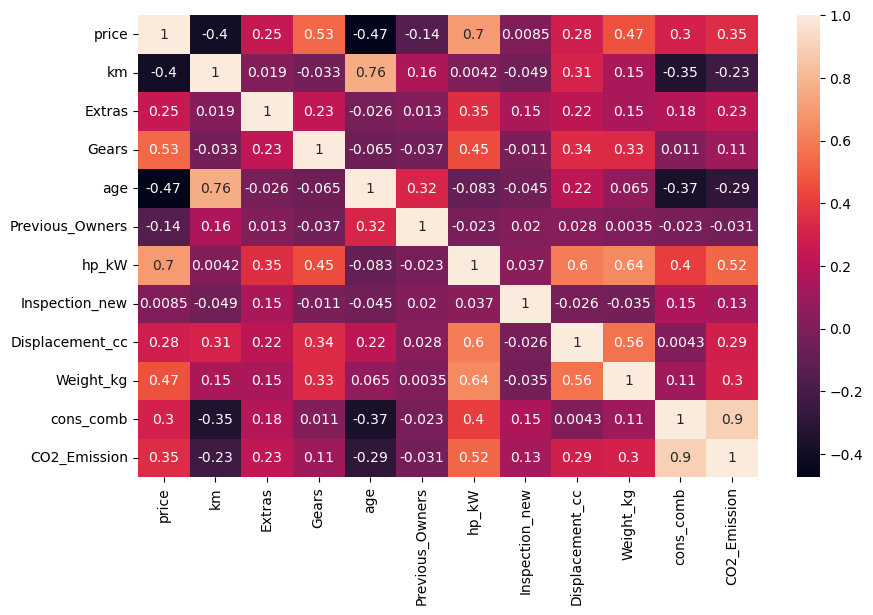

In [14]:
sns.heatmap(data = df.corr(), annot=True);

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

## OneHotEncoder

### Example

OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally, we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege, categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.

However, when converting to categorical data, the following should not be forgotten: **if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.** 

Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.

With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".

If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")


In [ ]:
train = {"train":['good','bad','worst','good', 'good', 'bad', 'bed']}
test = {"test": ['bad','worst','good', 'good', 'bad', "bed", "resume", "car"]}
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [ ]:
test

,test
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,resume
7,car


In [ ]:
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [ ]:
enc.fit_transform(train[["train"]])
# Since the fit process is done on the train set, 
# the transformation (transformation) in both the train and the test set will only be made according to 
# the unique observations in the train set.


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
enc.transform(test[["test"]])
# Since the transformation in the test set is made according to the unique observations in the train set, 
# the unique observations in both the train and the test set are converted to 1, while the non-observations (resume, car) are converted to 0.


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
enc.get_feature_names_out(["train"])

array(['train_bad', 'train_bed', 'train_good', 'train_worst'],
      dtype=object)

In [ ]:
pd.DataFrame(enc.fit_transform(train[["train"]]), columns = enc.get_feature_names_out(["train"]))

,train_bad,train_bed,train_good,train_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [ ]:
pd.DataFrame(enc.transform(test[["test"]]), columns = enc.get_feature_names_out(["train"]))

# When we name the features, we better see that the value 0 is assigned to the observations that are in the test set but not in the train set.

,train_bad,train_bed,train_good,train_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0


## OrdinalEncoder

### Example

In [ ]:
train2 = {"train":['good','bad','worst','good', 'good', 'bad']}
test2 = {"test": ['bad','worst','good', 'good', 'bad']}
train2 = pd.DataFrame(train2)
test2 = pd.DataFrame(test2)
train2

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad


In [ ]:
test2

,test
0,bad
1,worst
2,good
3,good
4,bad


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories= [categories])

In [ ]:
enc_2.fit_transform(train2[["train"]])

array([[2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [ ]:
enc_2.transform(test2[["test"]])

array([[1.],
       [0.],
       [2.],
       [2.],
       [1.]])

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder 

## Scaling

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Cross Validate

## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline 
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___